In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
import random
from sklearn.manifold import TSNE

In [7]:
path = "/l/users/ayesha.ishaq/3dmotformer/output_pkl_split_2_/validation/0003/034.pkl"
with open(path, "rb") as f:
    frame_data = pickle.load(f)
index = []
for i in range(len(frame_data['dets']['translation'])):
    print(len(frame_data['dets']['points'][i]))
    print("class",frame_data['dets']['class'][i])
    print("class open",frame_data['dets']['class_openscene'][i])
    if len(frame_data['dets']['points'][i]) > 30 and len(frame_data['dets']['points'][i]) < 50:
        if len(index) > 1:
            break
        index.append(i)



7
class 4
class open 4
7
class 2
class open 6
7
class 5
class open 6
7
class 0
class open 1
7
class 1
class open 6
7
class 0
class open 6
7
class 0
class open 6
7
class 3
class open 6
7
class 0
class open 6
7
class 3
class open 6
7
class 2
class open 6
7
class 2
class open 6
7
class 2
class open 6
7
class 5
class open 1
7
class 5
class open 1
7
class 1
class open 1
7
class 0
class open 6
7
class 2
class open 6
7
class 6
class open 6
7
class 1
class open 6
7
class 2
class open 1
7
class 1
class open 6
7
class 2
class open 6
7
class 5
class open 6
7
class 1
class open 6
7
class 4
class open 6
7
class 0
class open 6
7
class 2
class open 6
7
class 2
class open 1
7
class 5
class open 6
7
class 3
class open 6
7
class 0
class open 6
7
class 0
class open 1
7
class 2
class open 6
7
class 5
class open 6
7
class 2
class open 6
7
class 0
class open 6
7
class 2
class open 1
7
class 2
class open 6
7
class 2
class open 6
7
class 1
class open 6
7
class 6
class open 6
7
class 5
class open 6


In [8]:
import clip

In [9]:
def load_clip(model_name="ViT-L/14@336px"):

    print("Loading CLIP {} model...".format(model_name))
    clip_pretrained, _ = clip.load(model_name, device='cuda', jit=False)
    print("Finish loading")
    
    return clip_pretrained

def extract_clip_feature(labelset, clip_pretrained):
    # "ViT-L/14@336px" # the big model that OpenSeg uses
    # print("Loading CLIP {} model...".format(model_name))
    # clip_pretrained, _ = clip.load(model_name, device='cuda', jit=False)
    # print("Finish loading")

    if isinstance(labelset, str):
        lines = labelset.split(',')
    elif isinstance(labelset, list):
        lines = labelset
    else:
        raise NotImplementedError

    labels = []
    for line in lines:
        label = line
        labels.append(label)
    text = clip.tokenize(labels)
    text = text.cuda()
    text_features = clip_pretrained.encode_text(text)
    text_features = text_features / text_features.norm(dim=-1, keepdim=True)

    return text_features


In [10]:
NUSCENES_LABELS = ['car', 'pedestrian', 'bicycle', 'truck', 'bus', 'motorcycle', 'trailer']
clip_model = load_clip()
clip_labels = []
for each in NUSCENES_LABELS:
    clip_labels.append(extract_clip_feature(each, clip_model).cpu().detach().numpy() )


Loading CLIP ViT-L/14@336px model...
Finish loading


In [19]:
print((np.array(clip_labels)[4]))

[[ 3.2024e-03  5.2338e-03  4.5807e-02 -2.8580e-02  8.6517e-03 -7.1487e-03
  -4.2343e-03 -1.6937e-02 -1.6159e-02 -3.5614e-02 -2.7191e-02  2.6443e-02
  -5.1155e-03 -8.1100e-03  3.0975e-02  4.8027e-03  3.1342e-02 -8.1253e-03
   4.0161e-02  1.0170e-02  3.8471e-03 -7.8964e-03  6.7596e-03  3.0613e-03
  -3.4542e-03 -8.0414e-03  9.5367e-03  4.3274e-02  6.1157e-02  1.2848e-02
  -2.2919e-02  2.1988e-02 -2.7237e-02 -1.7052e-03 -8.8196e-03  3.9337e-02
   1.4938e-02 -1.3176e-02 -5.7144e-03 -2.4292e-02 -1.6754e-02  2.7733e-03
   3.2074e-02 -2.6978e-02  2.3438e-02 -1.7731e-02 -3.9673e-02 -3.0212e-03
   3.0624e-02 -5.3864e-03  2.3895e-02 -3.5919e-02  4.4708e-03  1.8387e-02
   1.5747e-02  2.7542e-03  1.3390e-02  1.3748e-02 -9.8801e-03 -3.4363e-02
  -1.6464e-02  7.2144e-02  2.0103e-03  1.5129e-02 -5.6076e-04  1.6068e-02
   3.7415e-02  2.7527e-02  8.2245e-03  5.7983e-03 -5.3673e-03  3.0090e-02
   4.5380e-02  1.0078e-02 -1.1040e-02 -4.9927e-02 -3.1738e-02  3.2440e-02
  -1.5747e-02 -3.2837e-02 -3.6072e-02 

/home/ayesha.ishaq/.conda/envs/3dmotformer/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/home/ayesha.ishaq/.conda/envs/3dmotformer/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


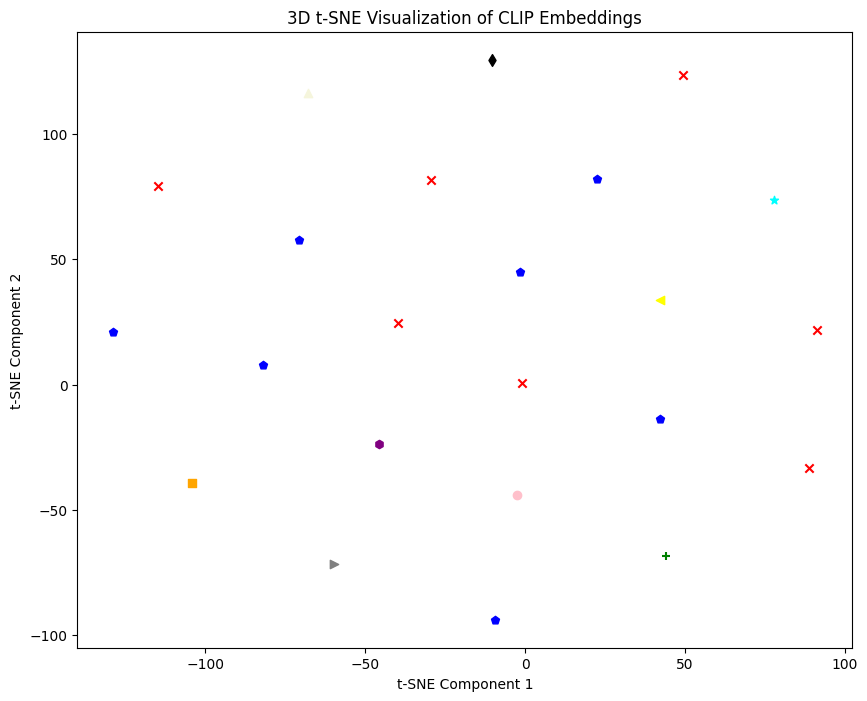

In [13]:
%matplotlib inline
# Apply t-SNE to reduce dimensions to 3D
tsne_3d = TSNE(n_components=2, random_state=42)
example_1 = tsne_3d.fit_transform(np.concatenate([frame_data['dets']['pt_features'][3], frame_data['dets']['embedding'][3].reshape(1, -1), \
frame_data['dets']['pt_features'][5], \
frame_data['dets']['embedding'][5].reshape(1, -1), \
np.array(clip_labels).reshape(7, -1)], axis=0))
# embeddings_example_1 = tsne_3d.fit_transform(frame_data['dets']['pt_features'][3])
# embeddings_example_2 = tsne_3d.fit_transform(frame_data['dets']['pt_features'][5])
# labels = tsne_3d.fit_transform(np.array(clip_labels).reshape(7, -1))

col = ['red']*len(frame_data['dets']['pt_features'][3]) + ['pink'] + \
['blue']*len(frame_data['dets']['pt_features'][5])  + ['purple'] + [ 'green', 'orange', 'black', 'yellow', 'grey', 'beige', 'cyan']
#  ['car', 'pedestrian', 'bicycle', 'truck', 'bus', 'motorcycle', 'trailer']
mark = ['x']*len(frame_data['dets']['pt_features'][3]) + ['o'] + \
['p']*len(frame_data['dets']['pt_features'][5])  + ['h'] + [ '+', 's', 'd', '<', '>', '^', '*']
# Plot 3D visualization
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111)
# ax.scatter(embeddings_example_1[:, 0], embeddings_example_1[:, 1], c='blue', marker='o')
# ax.scatter(embeddings_example_2[:, 0], embeddings_example_2[:, 1], c='red', marker='o')
for i in range(example_1.shape[0]):
    ax.scatter(example_1[i, 0], example_1[i, 1], color=col[i], marker=mark[i])

ax.set_title('3D t-SNE Visualization of CLIP Embeddings')
ax.set_xlabel('t-SNE Component 1')
ax.set_ylabel('t-SNE Component 2')
# ax.set_zlabel('t-SNE Component 3')
plt.show()

In [3]:

cls_attr_dist = {
    "barrier": {
        "cycle.with_rider": 0,
        "cycle.without_rider": 0,
        "pedestrian.moving": 0,
        "pedestrian.sitting_lying_down": 0,
        "pedestrian.standing": 0,
        "vehicle.moving": 0,
        "vehicle.parked": 0,
        "vehicle.stopped": 0,
    },
    "bicycle": {
        "cycle.with_rider": 2791,
        "cycle.without_rider": 8946,
        "pedestrian.moving": 0,
        "pedestrian.sitting_lying_down": 0,
        "pedestrian.standing": 0,
        "vehicle.moving": 0,
        "vehicle.parked": 0,
        "vehicle.stopped": 0,
    },
    "bus": {
        "cycle.with_rider": 0,
        "cycle.without_rider": 0,
        "pedestrian.moving": 0,
        "pedestrian.sitting_lying_down": 0,
        "pedestrian.standing": 0,
        "vehicle.moving": 9092,
        "vehicle.parked": 3294,
        "vehicle.stopped": 3881,
    },
    "car": {
        "cycle.with_rider": 0,
        "cycle.without_rider": 0,
        "pedestrian.moving": 0,
        "pedestrian.sitting_lying_down": 0,
        "pedestrian.standing": 0,
        "vehicle.moving": 114304,
        "vehicle.parked": 330133,
        "vehicle.stopped": 46898,
    },
    "construction_vehicle": {
        "cycle.with_rider": 0,
        "cycle.without_rider": 0,
        "pedestrian.moving": 0,
        "pedestrian.sitting_lying_down": 0,
        "pedestrian.standing": 0,
        "vehicle.moving": 882,
        "vehicle.parked": 11549,
        "vehicle.stopped": 2102,
    },
    "ignore": {
        "cycle.with_rider": 307,
        "cycle.without_rider": 73,
        "pedestrian.moving": 0,
        "pedestrian.sitting_lying_down": 0,
        "pedestrian.standing": 0,
        "vehicle.moving": 165,
        "vehicle.parked": 400,
        "vehicle.stopped": 102,
    },
    "motorcycle": {
        "cycle.with_rider": 4233,
        "cycle.without_rider": 8326,
        "pedestrian.moving": 0,
        "pedestrian.sitting_lying_down": 0,
        "pedestrian.standing": 0,
        "vehicle.moving": 0,
        "vehicle.parked": 0,
        "vehicle.stopped": 0,
    },
    "pedestrian": {
        "cycle.with_rider": 0,
        "cycle.without_rider": 0,
        "pedestrian.moving": 157444,
        "pedestrian.sitting_lying_down": 13939,
        "pedestrian.standing": 46530,
        "vehicle.moving": 0,
        "vehicle.parked": 0,
        "vehicle.stopped": 0,
    },
    "traffic_cone": {
        "cycle.with_rider": 0,
        "cycle.without_rider": 0,
        "pedestrian.moving": 0,
        "pedestrian.sitting_lying_down": 0,
        "pedestrian.standing": 0,
        "vehicle.moving": 0,
        "vehicle.parked": 0,
        "vehicle.stopped": 0,
    },
    "trailer": {
        "cycle.with_rider": 0,
        "cycle.without_rider": 0,
        "pedestrian.moving": 0,
        "pedestrian.sitting_lying_down": 0,
        "pedestrian.standing": 0,
        "vehicle.moving": 3421,
        "vehicle.parked": 19224,
        "vehicle.stopped": 1895,
    },
    "truck": {
        "cycle.with_rider": 0,
        "cycle.without_rider": 0,
        "pedestrian.moving": 0,
        "pedestrian.sitting_lying_down": 0,
        "pedestrian.standing": 0,
        "vehicle.moving": 21339,
        "vehicle.parked": 55626,
        "vehicle.stopped": 11097,
    },
}

In [6]:
import os
import json
import operator

In [12]:
f = open("/home/ayesha.ishaq/Desktop/3DMOTFormer/det/validation/val.json")
annos = json.load(f)

In [4]:
print(annos.keys())

dict_keys(['results', 'meta'])


In [13]:
for each in annos['results']:
    for det in annos['results'][each]:
        if 'detection_name5' in det.keys():
            det['detection_name'] = det['detection_name5']
            del det['detection_name2']
            del det['detection_name3']
            del det['detection_name4']
            del det['detection_name5']
            max(cls_attr_dist[det['detection_name']].items(), key=operator.itemgetter(1))[0]

In [14]:
with open("/home/ayesha.ishaq/Desktop/3DMOTFormer/det/validation/val_2.json", 'w') as f:
    json.dump(annos, f)

In [7]:
! export PYTHONPATH="${PYTHONPATH}:/home/ayesha.ishaq/Desktop/3DMOTFormer/nuscenes-devkit/python-sdk"

In [6]:
from nuscenes.nuscenes import NuScenes, NuScenesExplorer
from nuscenes.utils.splits import create_splits_scenes


In [7]:
def category_to_tracking_name(category_name):
    """
    Default label mapping from nuScenes to nuScenes tracking classes.
    :param category_name: Generic nuScenes class.
    :return: nuScenes tracking class.
    """
    tracking_mapping = {
        'vehicle.bicycle': 'bicycle',
        'vehicle.bus.bendy': 'bus',
        'vehicle.bus.rigid': 'bus',
        'vehicle.car': 'car',
        'vehicle.motorcycle': 'motorcycle',
        'human.pedestrian.adult': 'pedestrian',
        'human.pedestrian.child': 'pedestrian',
        'human.pedestrian.construction_worker': 'pedestrian',
        'human.pedestrian.police_officer': 'pedestrian',
        'vehicle.trailer': 'trailer',
        'vehicle.truck': 'truck'
    }

    if category_name in tracking_mapping:
        return tracking_mapping[category_name]
    else:
        return None

In [2]:
dataset_dir = "/l/users/ayesha.ishaq/nuScenes"

version_fullname = 'v1.0-trainval'
nusc = NuScenes(version=version_fullname, dataroot=dataset_dir, verbose=True)
sequences_by_name = {scene["name"]: scene for scene in nusc.scene}
splits_to_scene_names = create_splits_scenes()

train_split = 'train' 
val_split = 'val' 
train_scenes = splits_to_scene_names[train_split]
val_scenes = splits_to_scene_names[val_split]
scenes = [train_scenes, val_scenes]


Loading NuScenes tables for version v1.0-trainval...
23 category,
8 attribute,
4 visibility,
64386 instance,
12 sensor,
10200 calibrated_sensor,
2631083 ego_pose,
68 log,
850 scene,
34149 sample,
2631083 sample_data,
1166187 sample_annotation,
4 map,
Done loading in 35.357 seconds.
Reverse indexing ...
Done reverse indexing in 8.8 seconds.


In [10]:
from tqdm import tqdm
import numpy as np

In [12]:
class_stats = {
    'bicycle':{'objects':0, 'points': 0, 'size':[0.0,0.0,0.0]},
    'car':{'objects':0, 'points': 0, 'size':[0.0,0.0,0.0]},
    'pedestrian':{'objects':0, 'points': 0, 'size':[0.0,0.0,0.0]},
    'bus':{'objects':0, 'points': 0, 'size':[0.0,0.0,0.0]},
    'motorcycle':{'objects':0, 'points': 0, 'size':[0.0,0.0,0.0]},
    'trailer':{'objects':0, 'points': 0, 'size':[0.0,0.0,0.0]},
    'truck':{'objects':0, 'points': 0, 'size':[0.0,0.0,0.0]},
}
for scene_id, scene_name in enumerate(tqdm(train_scenes)):
    scene = sequences_by_name[scene_name]
    first_token = scene['first_sample_token']
    last_token = scene['last_sample_token']
    current_token = first_token
    while True:
        current_sample = nusc.get('sample', current_token)
        frame_ann_tokens = current_sample['anns']
        for ann_token in frame_ann_tokens:
            ann = nusc.get('sample_annotation', ann_token)
            tracking_name = category_to_tracking_name(ann['category_name'])
            if tracking_name is not None:
                class_stats[tracking_name]['objects'] += 1
                class_stats[tracking_name]['points'] += ann['num_lidar_pts']
                class_stats[tracking_name]['size'] = np.mean( np.array([ class_stats[tracking_name]['size'], ann['size'] ]), axis=0 )

        if current_token == last_token:
            break

        next_token = current_sample['next']
        current_token = next_token


100%|██████████| 700/700 [00:10<00:00, 64.78it/s] 


In [19]:
for each in class_stats:
    print(each)
    print('Total objects: ', class_stats[each]['objects'])
    print('Total points: ', class_stats[each]['points'])
    print('Average size: width -', class_stats[each]['size'][0], 'length -', class_stats[each]['size'][1], 'height -', class_stats[each]['size'][2])
    print('Average pts per box: ', class_stats[each]['points']/class_stats[each]['objects'])

bicycle
Total objects:  9478
Total points:  138079
Average size: width - 0.6776249999965609 length - 1.8325625000071157 height - 1.797374999989377
Average pts per box:  14.568368854188648
car
Total objects:  413318
Total points:  33354840
Average size: width - 1.6411146210434855 length - 3.878356278579936 height - 1.3985616222820314
Average pts per box:  80.70018726501145
pedestrian
Total objects:  185847
Total points:  1899754
Average size: width - 0.586692947011859 length - 0.4566880569804699 height - 1.9132403324810232
Average pts per box:  10.222139717079102
bus
Total objects:  13163
Total points:  3837687
Average size: width - 3.0316666666666667 length - 13.178333333333335 height - 3.911666666666666
Average pts per box:  291.5510901770113
motorcycle
Total objects:  10109
Total points:  366441
Average size: width - 0.8231420898437631 length - 2.112076660156747 height - 1.575506022135504
Average pts per box:  36.24898605203284
trailer
Total objects:  20701
Total points:  4613349
Ave